In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from collections import OrderedDict

from astropy.cosmology import wCDM
from astropy.cosmology import FlatLambdaCDM, FlatwCDM

In [2]:
# get correct cosmology

h0 = 70
cosmo = wCDM(H0=h0, Om0=0.3, w0=-1, Ode0=0.7)

xaxis = np.arange(0.001,1.5,0.015)
theor_dist = np.array([cosmo.distmod(z).value for z in xaxis])

In [3]:
# read SALT2mu results
cases_ddf = ['perfect3000', 'random3000', 'fiducial3000', '99SNIa1SNII', '99SNIa1SNIbc', 
         '99SNIa1SNIax', '99.8SNIa0.2SNIa-91bg', '99.1SNIa0.9CART', '99.9SNIa0.1AGN']

colors_ddf = ['black', 'tab:red', 'tab:blue', 'orange', 'brown', 'green', 'purple', 'cyan', 'pink']

data_ddf = {}

for name in cases_ddf:
    fname = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data/DDF/v0/fitres/'+ \
            'test_salt2mu_lowz_withbias_' + name + '.fitres'

    data_temp = pd.read_csv(fname, delim_whitespace=True, comment='#')
    
    if 'perfect' not in name:
        fitres_temp = pd.read_csv(fname, delim_whitespace=True, comment='#')
        
        # 11 are Ia and 1 are lowz, different sims
        mask = np.logical_and(fitres_temp['SIM_TYPE_INDEX'].values != 11,
                              fitres_temp['SIM_TYPE_INDEX'].values != 1)
        fitres_temp3 = fitres_temp[mask]

        # remove duplicated redshift
        z_all = []
        for j in range(fitres_temp3.shape[0]):
    
            z = fitres_temp3.iloc[j]['SIM_ZCMB']
            z_new = z
            if z in z_all:
                while z_new in z_all:
                    z_new = z + np.random.normal(loc=0, scale=0.001)
            
            fitres_temp3.loc[j, 'SIM_ZCMB'] = z_new
            z_all.append(z_new)
        
        indx = np.argsort(z_all)
        fitres_temp2 = fitres_temp3[['SIM_ZCMB', 'MU', 'MUERR', 'MURES']].iloc[indx]
        data_ddf[name] = fitres_temp2
    else:
        data_ddf[name] = data_temp

/media/emille/git/COIN/RESSPECT_repo/venv/resspect_main/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
all_shapes = {'SNIa-91bg': 'o',
              'SNIax': 's',
              'SNII': 'd',
              'SNIbc': 'X',
              'AGN': '^',
              'CART': 'v',
              'TDE': '*',
              'random': '<',
              'fiducial': '>'}

remap_dict_ddf = OrderedDict({
                          'perfect3000': 'Perfect', 
                          'fiducial3000': 'Fiducial', 
                          'random3000': 'Random',
                          '72SNIa28SNII': 'SN-II 28',
                          '75SNIa25SNII': 'SN-II 25', 
                          '90SNIa10SNII': 'SN-II 10',
                          '95SNIa5SNII': 'SN-II 5',
                          '98SNIa2SNII': 'SN-II 2',
                          '99SNIa1SNII': 'SN-II 1',
                          '95SNIa5SNIbc': 'SN-Ibc 5',
                          '98SNIa2SNIbc': 'SN-Ibc 2',
                          '99SNIa1SNIbc': 'SN-Ibc 1',
                          '86SNIa14SNIax': 'SN-Iax 14',
                          '90SNIa10SNIax': 'SN-Iax 10',
                          '95SNIa5SNIax': 'SN-Iax 5',
                          '98SNIa2SNIax': 'SN-Iax 2',
                          '99SNIa1SNIax': 'SN-Iax 1',
                          '99.1SNIa0.9CART': 'CART 0.9',
                          '99.8SNIa0.2SNIa-91bg': 'SN-Ia-91bg 0.2',
                          '99.9SNIa0.1AGN': 'AGN 0.1',
              })

remap_dict_wfd = OrderedDict({
                              'perfect3000': 'Perfect', 
                              'fiducial3000': 'Fiducial', 
                              'random3000': 'Random',
                              '72SNIa28SNII': 'SN-II 28',
                              '75SNIa25SNII': 'SN-II 25', 
                              '90SNIa10SNII': 'SN-II 10',
                              '95SNIa5SNII': 'SN-II 5',
                              '98SNIa2SNII': 'SN-II 2',
                              '99SNIa1SNII': 'SN-II 1',
                              '90SNIa10SNIbc': 'SN-Ibc 10',
                              '95SNIa5SNIbc': 'SN-Ibc 5',
                              '98SNIa2SNIbc': 'SN-Ibc 2',
                              '99SNIa1SNIbc': 'SN-Ibc 1',
                              '75SNIa25SNIax': 'SN-Iax 25',
                              '90SNIa10SNIax': 'SN-Iax 10',
                              '95SNIa5SNIax': 'SN-Iax 5',
                              '98SNIa2SNIax': 'SN-Iax 2',
                              '99SNIa1SNIax': 'SN-Iax 1',
                              '95SNIa5SNIa-91bg': 'SN-Ia-91bg 5',
                              '98SNIa2SNIa-91bg': 'SN-Ia-91bg 2',
                              '99SNIa1SNIa-91bg': 'SN-Ia-91bg 1',
                              '95SNIa5AGN': 'AGN 5',
                              '98SNIa2AGN': 'AGN 2',
                              '99SNIa1AGN': 'AGN 1',
                              '99.6SNIa0.4TDE': 'TDE 0.4',
                              '99.7SNIa0.3CART': 'CART 0.3',
                  })

In [5]:
# read SALT2mu results
cases_wfd = ['perfect3000', 'random3000', 'fiducial3000', '99SNIa1SNII', '99SNIa1SNIbc', 
         '99SNIa1SNIax', '99SNIa1SNIa-91bg', '99.7SNIa0.3CART', '99SNIa1AGN','99.6SNIa0.4TDE']

colors_wfd = ['black', 'tab:red', 'tab:blue', 'orange', 'brown', 'green', 'purple', 'cyan', 'pink', 
         'magenta']

data_wfd = {}

for name in cases_wfd:
    fname = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data/WFD/v0/fitres/'+ \
            'test_salt2mu_lowz_withbias_' + name + '.fitres'

    data_temp = pd.read_csv(fname, delim_whitespace=True, comment='#')
    
    if 'perfect' not in name:
        fitres_temp = pd.read_csv(fname, delim_whitespace=True, comment='#')
        
        # 11 are Ia and 1 are lowz, different sims
        mask = np.logical_and(fitres_temp['SIM_TYPE_INDEX'].values != 11,
                              fitres_temp['SIM_TYPE_INDEX'].values != 1)
        fitres_temp3 = fitres_temp[mask]

        # remove duplicated redshift
        z_all = []
        for j in range(fitres_temp3.shape[0]):
    
            z = fitres_temp3.iloc[j]['SIM_ZCMB']
            z_new = z
            if z in z_all:
                while z_new in z_all:
                    z_new = z + np.random.normal(loc=0, scale=0.001)
            
            fitres_temp3.at[j, 'SIM_ZCMB'] = z_new
            z_all.append(z_new)
        
        indx = np.argsort(z_all)
        fitres_temp2 = fitres_temp3[['SIM_ZCMB', 'MU', 'MUERR','MURES']].iloc[indx]
        data_wfd[name] = fitres_temp2
    else:
        data_wfd[name] = data_temp


/media/emille/git/COIN/RESSPECT_repo/venv/resspect_main/lib/python3.7/site-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value


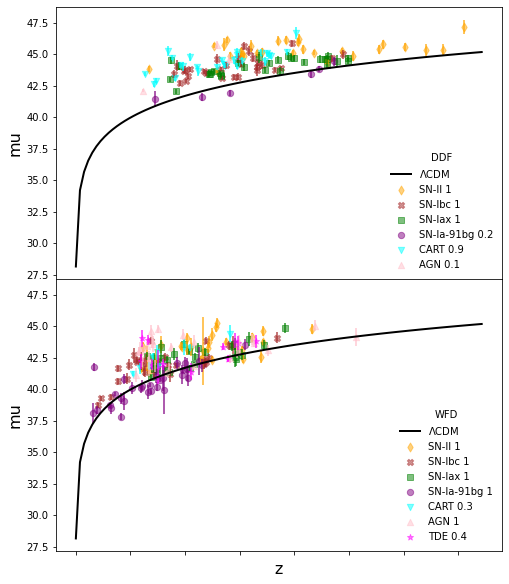

In [8]:
plt.figure(figsize=(8,10))
           
ax1 = plt.subplot(2,1,1)
plt.plot(xaxis, theor_dist, lw=2, color='black', label=r'$\Lambda$CDM')

for i in range(3, len(cases_ddf)):
    for key in all_shapes:
        if key in cases_ddf[i]:
            cont = key
            
    plt.scatter(data_ddf[cases_ddf[i]]['SIM_ZCMB'], data_ddf[cases_ddf[i]]['MU'],
                marker=all_shapes[cont], s=40, 
                 color=colors_ddf[i], label=remap_dict_ddf[cases_ddf[i]], alpha=0.5)
    
    plt.errorbar(data_ddf[cases_ddf[i]]['SIM_ZCMB'], data_ddf[cases_ddf[i]]['MU'], 
                 yerr=data_ddf[cases_ddf[i]]['MUERR'], fmt=' ',
                 color=colors_ddf[i],  alpha=0.85)

#plt.xlabel('z', fontsize=16)
plt.ylabel('mu', fontsize=16)
plt.legend(loc='lower right', title='DDF', frameon=False)
plt.xticks(ax1.get_xticks(), [])

ax2 = plt.subplot(2,1,2, sharex=ax1, sharey=ax1)
plt.plot(xaxis, theor_dist, lw=2, color='black', label=r'$\Lambda$CDM')

for i in range(3, len(cases_wfd)):
    for key in all_shapes:
        if key in cases_wfd[i]:
            cont = key
            
    plt.scatter(data_wfd[cases_wfd[i]]['SIM_ZCMB'], data_wfd[cases_wfd[i]]['MU'],
                marker=all_shapes[cont], s=40, 
                 color=colors_wfd[i], label=remap_dict_wfd[cases_wfd[i]], alpha=0.5)
    
    plt.errorbar(data_wfd[cases_wfd[i]]['SIM_ZCMB'], data_wfd[cases_wfd[i]]['MU'], 
                 yerr=data_wfd[cases_wfd[i]]['MUERR'], fmt=' ',
                 color=colors_wfd[i],  alpha=0.85)

plt.xlabel('z', fontsize=16)
plt.ylabel('mu', fontsize=16)
plt.legend(loc='lower right', title='WFD', frameon=False)

plt.subplots_adjust(hspace=0.001)

plt.show()

In [9]:
# simulated model
xaxis = np.arange(0.001,1.5, 0.05)
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
theor_dist = np.array([cosmo.distmod(z).value for z in xaxis])

root_dir = {}
root_dir['DDF'] = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data/DDF/v1/'
root_dir['WFD'] = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data/WFD/v1/'

# read summary table
summ = {}
for field in root_dir.keys():
    fname_summ = root_dir[field] + 'summary_stats.csv'
    summ[field] = pd.read_csv(fname_summ)
    
dist = {}

for field in root_dir.keys():
    
    dist[field] = {}
    for i in range(summ[field].shape[0]):
        
        case = summ[field]['case'].iloc[i]
        
        dist[field][case] = {}
        
        cosmo_wfit = FlatwCDM(H0=70, Om0=summ[field]['wfit_om_lowz'].iloc[i], 
                              w0=summ[field]['wfit_w_lowz'].iloc[i])
        dist[field][case]['wfit'] = [cosmo_wfit.distmod(z).value for z in xaxis]
        
        cosmo_stan = FlatwCDM(H0=70, Om0=summ[field]['stan_om_lowz'].iloc[i], 
                              w0=summ[field]['stan_w_lowz'].iloc[i])
        dist[field][case]['stan'] = [cosmo_stan.distmod(z).value for z in xaxis]
        

In [36]:
dist['WFD']['perfect3000']

{'wfit': [28.16014811691467,
  36.77200268121199,
  38.32474305471858,
  39.26245262501625,
  39.943838815482266,
  40.482741668336544,
  40.9302689646194,
  41.31387490130119,
  41.65006395727892,
  41.94956184138682,
  42.219750332692286,
  42.465938717624006,
  42.69208141958023,
  42.901208467632415,
  43.095696698443305,
  43.27744767490789,
  43.44800844472989,
  43.6086559146015,
  43.7604572976406,
  43.904314376107855,
  44.0409965425862,
  44.17116588922711,
  44.29539655152735,
  44.41418982799453,
  44.527986145115015,
  44.63717463256478,
  44.74210086454512,
  44.843073177077116,
  44.94036786743527,
  45.03423350726422],
 'stan': [28.16034051451108,
  36.78136172082364,
  38.342418456690716,
  39.287651258355105,
  39.97582434945501,
  40.5208336308897,
  40.97384123568702,
  41.3623537088299,
  41.70292546660503,
  42.006329437884965,
  42.27999169686916,
  42.52926278428021,
  42.75813530104995,
  42.96967440759838,
  43.1662891089965,
  43.3499102964412,
  43.52211165

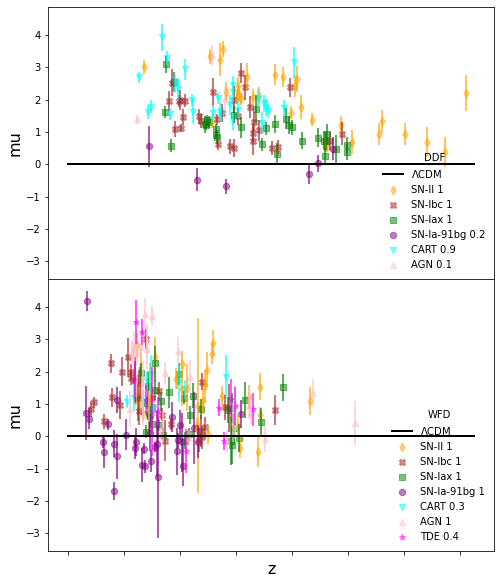

In [17]:
plt.figure(figsize=(8,10))
           
ax1 = plt.subplot(2,1,1)
plt.plot(xaxis, np.full((xaxis.shape[0]),0), lw=2, color='black', label=r'$\Lambda$CDM')

for i in range(3, len(data_ddf)):
    for key in all_shapes:
        if key in cases_ddf[i]:
            cont = key
            
    plt.scatter(data_ddf[cases_ddf[i]]['SIM_ZCMB'], data_ddf[cases_ddf[i]]['MURES'],
                marker=all_shapes[cont], s=40, 
                 color=colors_ddf[i], label=remap_dict_ddf[cases_ddf[i]], alpha=0.5)
    
    plt.errorbar(data_ddf[cases_ddf[i]]['SIM_ZCMB'], data_ddf[cases_ddf[i]]['MURES'], 
                 yerr=data_ddf[cases_ddf[i]]['MUERR'], fmt=' ',
                 color=colors_ddf[i],  alpha=0.85)
    #plt.plot(xaxis, dist['DDF'][key]['stan'] - theor_dist, 
    #             label='stan - ' + remap_dict[key], color=cs11[i])

#plt.xlabel('z', fontsize=16)
plt.ylabel('mu', fontsize=16)
plt.legend(loc='lower right', title='DDF', frameon=False)
plt.xticks(ax1.get_xticks(), [])

ax2 = plt.subplot(2,1,2, sharex=ax1, sharey=ax1)
plt.plot(xaxis, np.full((xaxis.shape[0]),0), lw=2, color='black', label=r'$\Lambda$CDM')

for i in range(3, len(data_wfd)):
    for key in all_shapes:
        if key in cases_wfd[i]:
            cont = key

    plt.scatter(data_wfd[cases_wfd[i]]['SIM_ZCMB'], data_wfd[cases_wfd[i]]['MURES'],
                marker=all_shapes[cont], s=40, 
                 color=colors_wfd[i], label=remap_dict_wfd[cases_wfd[i]], alpha=0.5)
    
    plt.errorbar(data_wfd[cases_wfd[i]]['SIM_ZCMB'], data_wfd[cases_wfd[i]]['MURES'], 
                 yerr=data_wfd[cases_wfd[i]]['MUERR'], fmt=' ',
                 color=colors_wfd[i],  alpha=0.85)

plt.xlabel('z', fontsize=16)
plt.ylabel('mu', fontsize=16)
plt.legend(loc='lower right', title='WFD', frameon=False)

plt.subplots_adjust(hspace=0.001)

plt.show()

In [18]:
fname = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data/WFD/v1/M0DIF/test_salt2mu_lowz_withbias_perfect3000.M0DIF'
data = pd.read_csv(fname, delim_whitespace=True, comment='#')

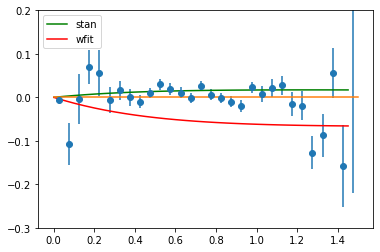

In [45]:
plt.errorbar(data['z'], data['MUDIF'], yerr=data['MUDIFERR'], fmt='o')
plt.plot(xaxis, dist['WFD']['perfect3000']['stan']-theor_dist , 
                 label='stan', color='green')
plt.plot(xaxis, dist['WFD']['perfect3000']['wfit']-theor_dist , 
                 label='wfit', color='red')
plt.plot([0,1.5], [0,0])
plt.ylim(-0.3,0.2)
plt.legend()
plt.show()

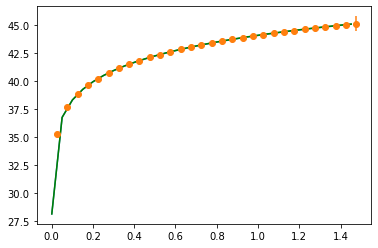

In [40]:
plt.plot(xaxis, theor_dist)
plt.errorbar(data['z'], data['MUREF'], yerr=data['MUDIFERR'], fmt='o')
plt.plot(xaxis, dist['WFD']['perfect3000']['stan'], 
                 label='perfect', color='green')
plt.show()